In [55]:
import pandas as pd

df_Base_fusca = pd.read_excel("08_MMM_TimeSeries_base.xlsx", sheet_name= "Base Fusca", skiprows=4, usecols=  ['Month', 'Facebook', 'Programática',
       'Youtube', 'UOL', 'Outros', 'Facebook.1', 'Programática.1', 'Youtube.1',
       'UOL.1', 'Outros.1'])
# renomear colunas
df_Base_fusca.columns= [ 'Month', 'Facebook_investimento', 'Programática_investimento', 'Youtube_investimento', 'UOL_investimento', 'Outros_investimento', 'Facebook_leads', 'Programática_leads', 'Youtube_leads',
       'UOL_leads', 'Outros_leads']

df_Base_fusca_altera = df_Base_fusca.copy() 

df_Base_fusca_altera.tail()

,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
13,2017-02-01,208994.980000,491499.464400,3222.930300,56715.758900,166924.346400,2681.60,100.56,33.52,30.5032,505.8168
14,2017-03-01,328435.620000,618041.868600,33521.000317,45935.497133,58349.993950,1504.95,57.15,38.10,15.6210,289.1790
15,2017-04-01,53297.100000,254391.701100,23625.100275,34653.107225,80334.221400,2141.16,76.47,101.96,24.2155,205.1945
16,2017-05-02,79562.492043,217749.978223,19890.623011,30359.371964,71187.492881,2831.24,76.52,76.52,32.1384,809.5816
17,2017-06-03,74537.492546,209374.979060,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282


In [56]:
import numpy as np
from scipy import stats

# Calcular z-score
z_scores = stats.zscore(df_Base_fusca_altera['Facebook_leads'])

# Encontrar índices de outliers
outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.5]

print("Outliers encontrados em Facebook_leads:")
display(outliers)

Outliers encontrados em Facebook_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
5,2016-06-01,189697.70886,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588
11,2016-12-01,55284.24552,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000


In [57]:
# Calcular z-score
z_scores = stats.zscore(df_Base_fusca_altera['Programática_leads'])

# Encontrar índices de outliers
outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.5]

print("Outliers encontrados em Programática_leads:")
display(outliers)

Outliers encontrados em Programática_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
3,2016-04-01,81396.278302,347615.5767,107648.585849,63146.828750,81791.9004,2468.20,282.08,35.26,32.0866,708.3734
5,2016-06-01,189697.708860,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588


In [58]:
import numpy as np
import pandas as pd
from scipy import stats


lista = ['Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads', 'Outros_leads']

datas_coletadas =[]
for col in lista:
    # Calcular z-score
    z_scores = stats.zscore(df_Base_fusca_altera[f'{col}'])
    
    # Encontrar índices de outliers
    outliers = df_Base_fusca_altera[np.abs(z_scores) > 1.3].reset_index(drop=True)
    
    print(f"Outliers encontrados em {col}:")
    if not outliers.empty:
        display(outliers)
        for i, data in enumerate(outliers['Month']):
            print(i, data)
            datas_coletadas.append(data)

Outliers encontrados em Facebook_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
0,2016-06-01,189697.70886,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588
1,2016-12-01,55284.24552,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000


0 2016-06-01 00:00:00
1 2016-12-01 00:00:00
Outliers encontrados em Programática_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
0,2016-04-01,81396.278302,347615.5767,107648.585849,63146.828750,81791.9004,2468.20,282.08,35.26,32.0866,708.3734
1,2016-05-01,145988.500300,330060.9572,10578.876833,52894.384167,95209.8915,2874.40,251.51,35.93,31.6184,399.5416
2,2016-06-01,189697.708860,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588
3,2016-12-01,55284.245520,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000


0 2016-04-01 00:00:00
1 2016-05-01 00:00:00
2 2016-06-01 00:00:00
3 2016-12-01 00:00:00
Outliers encontrados em Youtube_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
0,2016-01-01,60473.873061,143334.30770,29416.657409,22211.303080,15005.948750,1760.99,182.96,114.35,19.8969,208.8031
1,2016-10-01,113164.169100,351404.52510,25167.000650,43677.398600,62187.796550,2053.28,125.20,125.20,21.0336,179.2864
2,2017-06-03,74537.492546,209374.97906,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282


0 2016-01-01 00:00:00
1 2016-10-01 00:00:00
2 2017-06-03 00:00:00
Outliers encontrados em UOL_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
0,2016-06-01,189697.70886,391937.4150,65453.548305,50559.926535,86226.2313,3871.92,297.84,99.28,41.2012,653.7588
1,2016-12-01,55284.24552,194153.0051,23528.711635,19908.909845,36198.0179,900.00,17.00,17.00,5.0000,4.0000


0 2016-06-01 00:00:00
1 2016-12-01 00:00:00
Outliers encontrados em Outros_leads:


,Month,Facebook_investimento,Programática_investimento,Youtube_investimento,UOL_investimento,Outros_investimento,Facebook_leads,Programática_leads,Youtube_leads,UOL_leads,Outros_leads
0,2016-04-01,81396.278302,347615.576700,107648.585849,63146.828750,81791.900400,2468.20,282.08,35.26,32.0866,708.3734
1,2016-12-01,55284.245520,194153.005100,23528.711635,19908.909845,36198.017900,900.00,17.00,17.00,5.0000,4.0000
2,2017-05-02,79562.492043,217749.978223,19890.623011,30359.371964,71187.492881,2831.24,76.52,76.52,32.1384,809.5816
3,2017-06-03,74537.492546,209374.979060,38315.621168,33709.371629,62812.493718,1889.16,179.92,112.45,18.4418,49.0282


0 2016-04-01 00:00:00
1 2016-12-01 00:00:00
2 2017-05-02 00:00:00
3 2017-06-03 00:00:00


In [59]:
from collections import Counter
contagem = Counter(datas_coletadas)
print(contagem)

Counter({Timestamp('2016-12-01 00:00:00'): 4, Timestamp('2016-06-01 00:00:00'): 3, Timestamp('2016-04-01 00:00:00'): 2, Timestamp('2017-06-03 00:00:00'): 2, Timestamp('2016-05-01 00:00:00'): 1, Timestamp('2016-01-01 00:00:00'): 1, Timestamp('2016-10-01 00:00:00'): 1, Timestamp('2017-05-02 00:00:00'): 1})


In [60]:
data_contagem = pd.DataFrame.from_dict(contagem, orient='index', columns=['Frequência'])
data_contagem = data_contagem.sort_values('Frequência', ascending = False)
data_contagem

,Frequência
2016-12-01,4
2016-06-01,3
2016-04-01,2
2017-06-03,2
2016-05-01,1
2016-01-01,1
2016-10-01,1
2017-05-02,1


In [61]:
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leads'] 

11    900.0
Name: Facebook_leads, dtype: float64

In [62]:

for col in lista:
    # Soma de 13 dias (6 antes, 1 atual, 6 depois), centralizada
    soma_13 = df_Base_fusca_altera[col].rolling(window=13, center=True).sum()
    
    # Subtrai o valor atual para excluir o dia central
    soma_sem_central = soma_13 - df_Base_fusca_altera[col]
    
    # Calcula a média de 12 dias (6 antes + 6 depois, sem o atual)
    df_Base_fusca_altera[f'{col}media_6_antes_6_depois'] = soma_sem_central / 12

In [63]:
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Facebook_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Programática_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Programática_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Youtube_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Youtube_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','UOL_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','UOL_leadsmedia_6_antes_6_depois'] 
df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Outros_leads'] = df_Base_fusca_altera.loc[df_Base_fusca_altera['Month']=='2016-12-01','Outros_leadsmedia_6_antes_6_depois'] 


# corrigido os dados do dia 12/2016

In [64]:
df_Base_fusca_altera2= df_Base_fusca_altera[['Month', 'Facebook_investimento', 'Programática_investimento',
       'Youtube_investimento', 'UOL_investimento', 'Outros_investimento',
       'Facebook_leads', 'Programática_leads', 'Youtube_leads', 'UOL_leads',
       'Outros_leads']]

In [65]:
# Derrete o DataFrame mantendo a coluna Month
df_long = df_Base_fusca_altera2.melt(id_vars='Month', var_name='name', value_name='valor')

# Separa a coluna 'name' em nameplate e tipo (investimentos/leads)
df_long[['nameplate', 'tipo']] = df_long['name'].str.split('_', expand=True)

# Remove a coluna antiga
df_long = df_long.drop(columns='name')
df_long

,Month,valor,nameplate,tipo
0,2016-01-01,60473.873061,Facebook,investimento
1,2016-02-01,52028.197184,Facebook,investimento
2,2016-03-01,228511.969582,Facebook,investimento
3,2016-04-01,81396.278302,Facebook,investimento
4,2016-05-01,145988.500300,Facebook,investimento
...,...,...,...,...
175,2017-02-01,505.816800,Outros,leads
176,2017-03-01,289.179000,Outros,leads
177,2017-04-01,205.194500,Outros,leads
178,2017-05-02,809.581600,Outros,leads


In [66]:
# Pivot para ter colunas separadas de investimentos e leads
df_pivot = df_long.pivot_table(
    index=['Month', 'nameplate'],
    columns='tipo',
    values='valor',
    aggfunc='first'  # ou 'sum', se quiser agregar
).reset_index()
df_pivot

tipo,Month,nameplate,investimento,leads
0,2016-01-01,Facebook,60473.873061,1760.9900
1,2016-01-01,Outros,15005.948750,208.8031
2,2016-01-01,Programática,143334.307700,182.9600
3,2016-01-01,UOL,22211.303080,19.8969
4,2016-01-01,Youtube,29416.657409,114.3500
...,...,...,...,...
85,2017-06-03,Facebook,74537.492546,1889.1600
86,2017-06-03,Outros,62812.493718,49.0282
87,2017-06-03,Programática,209374.979060,179.9200
88,2017-06-03,UOL,33709.371629,18.4418


# usar o df_final

In [67]:
 #Resultado final  => coreto 
df_final = df_pivot[['Month', 'nameplate', 'investimento', 'leads']]
df_final

tipo,Month,nameplate,investimento,leads
0,2016-01-01,Facebook,60473.873061,1760.9900
1,2016-01-01,Outros,15005.948750,208.8031
2,2016-01-01,Programática,143334.307700,182.9600
3,2016-01-01,UOL,22211.303080,19.8969
4,2016-01-01,Youtube,29416.657409,114.3500
...,...,...,...,...
85,2017-06-03,Facebook,74537.492546,1889.1600
86,2017-06-03,Outros,62812.493718,49.0282
87,2017-06-03,Programática,209374.979060,179.9200
88,2017-06-03,UOL,33709.371629,18.4418


# calcular de forma correta o ROI

In [68]:
df_group_geral = df_final.groupby(['Month']).agg({'investimento':'sum', 'leads':'sum'}).reset_index()
df_group_geral['ROI(%)'] = (df_group_geral['leads']/df_group_geral['investimento'])*100
df_group_geral 

tipo,Month,investimento,leads,ROI(%)
0,2016-01-01,2.704421e+05,2287.000000,0.845652
1,2016-02-01,2.308607e+05,2615.000000,1.132717
2,2016-03-01,7.544001e+05,2523.000000,0.334438
3,2016-04-01,6.815992e+05,3526.000000,0.517313
4,2016-05-01,6.347326e+05,3593.000000,0.566065
5,2016-06-01,7.838748e+05,4964.000000,0.633264
6,2016-07-01,7.495170e+05,2010.000000,0.268173
7,2016-08-01,6.581322e+05,2520.000000,0.382902
8,2016-09-01,7.863641e+05,2277.000000,0.289561
9,2016-10-01,5.956009e+05,2504.000000,0.420416


In [69]:
df_SExponencial= df_group_geral.copy()

df_SExponencial.loc[18,'Month'] = '2017-07-01'
df_SExponencial.loc[19,'Month'] = '2017-08-01'
df_SExponencial.loc[df_SExponencial['Month'] == '2017-08-01', 'ROI(%)']=0.0
df_SExponencial.loc[df_SExponencial['Month'] == '2017-07-01', 'ROI(%)']=0.0
df_SExponencial['ROI previsto%'] = 0.0
df_SExponencial.loc[0,'ROI previsto%'] = df_SExponencial.loc[0,'ROI(%)'] 

df_SExponencial

tipo,Month,investimento,leads,ROI(%),ROI previsto%
0,2016-01-01,2.704421e+05,2287.000000,0.845652,0.845652
1,2016-02-01,2.308607e+05,2615.000000,1.132717,0.000000
2,2016-03-01,7.544001e+05,2523.000000,0.334438,0.000000
3,2016-04-01,6.815992e+05,3526.000000,0.517313,0.000000
4,2016-05-01,6.347326e+05,3593.000000,0.566065,0.000000
5,2016-06-01,7.838748e+05,4964.000000,0.633264,0.000000
6,2016-07-01,7.495170e+05,2010.000000,0.268173,0.000000
7,2016-08-01,6.581322e+05,2520.000000,0.382902,0.000000
8,2016-09-01,7.863641e+05,2277.000000,0.289561,0.000000
9,2016-10-01,5.956009e+05,2504.000000,0.420416,0.000000


In [70]:
#ROI_Previsto = calculo alfa * ROI dia anterior  +(1 – alfa)*(ROI previsto% anterior)
alfa = 0.5
def calcular_roi_previsto(series_roi,series_roiprev):

    ROI_Previsto = series_roi.shift(1) * alfa + (1-alfa) * series_roiprev.shift(1) 
    #print(series.shift(1).values)
    #print(ROI_Previsto)
   
    return ROI_Previsto

df_SExponencial['ROI previsto%']  = calcular_roi_previsto(df_SExponencial['ROI(%)'],df_SExponencial['ROI previsto%'])

In [71]:
df_SExponencial

tipo,Month,investimento,leads,ROI(%),ROI previsto%
0,2016-01-01,2.704421e+05,2287.000000,0.845652,NaN
1,2016-02-01,2.308607e+05,2615.000000,1.132717,0.845652
2,2016-03-01,7.544001e+05,2523.000000,0.334438,0.566359
3,2016-04-01,6.815992e+05,3526.000000,0.517313,0.167219
4,2016-05-01,6.347326e+05,3593.000000,0.566065,0.258656
5,2016-06-01,7.838748e+05,4964.000000,0.633264,0.283033
6,2016-07-01,7.495170e+05,2010.000000,0.268173,0.316632
7,2016-08-01,6.581322e+05,2520.000000,0.382902,0.134086
8,2016-09-01,7.863641e+05,2277.000000,0.289561,0.191451
9,2016-10-01,5.956009e+05,2504.000000,0.420416,0.144780


In [72]:
# Supondo que df_SExponencial já existe e tem a coluna 'ROI(%)'
#ROI_Previsto = calculo alfa * ROI dia anterior  +(1 – alfa)*(ROI previsto% anterior)
df_SExponencial['ROI previsto%'] = 0.0

# Inicializa o primeiro valor do previsto como o próprio ROI
df_SExponencial.loc[0, 'ROI previsto%'] = df_SExponencial.loc[0, 'ROI(%)']
df_copy_safe = df_SExponencial.copy()
# Parâmetro de suavização
alfa = 0.5

# Aplica a suavização exponencial recursiva
for i in range(1, len(df_SExponencial)):
    df_SExponencial.loc[i, 'ROI previsto%'] = (
        alfa * df_SExponencial.loc[i - 1, 'ROI(%)'] +
        (1 - alfa) * df_SExponencial.loc[i - 1, 'ROI previsto%']
    )

In [73]:
df_SExponencial

tipo,Month,investimento,leads,ROI(%),ROI previsto%
0,2016-01-01,2.704421e+05,2287.000000,0.845652,0.845652
1,2016-02-01,2.308607e+05,2615.000000,1.132717,0.845652
2,2016-03-01,7.544001e+05,2523.000000,0.334438,0.989185
3,2016-04-01,6.815992e+05,3526.000000,0.517313,0.661811
4,2016-05-01,6.347326e+05,3593.000000,0.566065,0.589562
5,2016-06-01,7.838748e+05,4964.000000,0.633264,0.577814
6,2016-07-01,7.495170e+05,2010.000000,0.268173,0.605539
7,2016-08-01,6.581322e+05,2520.000000,0.382902,0.436856
8,2016-09-01,7.863641e+05,2277.000000,0.289561,0.409879
9,2016-10-01,5.956009e+05,2504.000000,0.420416,0.349720


In [74]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt


def grafico_comparativo(df):
    fig, x = plt.subplots(figsize=(12, 6))
    
    # Formatando o eixo X
    x.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Mostra todos os meses
    x.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))  # Formato '01/2016'
        
        
    x.plot(df['Month'], df['ROI(%)'], color='green', marker='o', linewidth=2, label='ROI (%)')
    x.plot(df['Month'], df['ROI previsto%'], color='orange', marker='*', linewidth=2, linestyle='--', label='Previsto ROI (%)')
    
    x.set_ylabel('ROI (%)', color='green')
    x.tick_params(axis='y', labelcolor='green')
        
    # Títulos e grid
    plt.title(f'Forecast and Real ROI%')
    fig.autofmt_xdate()
    x.grid(True,  linestyle='--', alpha=0.5)
    
    plt.xlabel("Mês")
    plt.ylabel("ROI (%)")
    # Legenda combinada
    lines_1, labels_1 = x.get_legend_handles_labels()
    x.legend(lines_1 , labels_1 , loc='upper right')   
    plt.tight_layout()
    #plt.savefig(f'roi2.png', dpi=300, bbox_inches='tight')
    plt.show()

In [75]:
def calculo_erros(df):
    df['Erro Absoluto(%)'] = abs(df['ROI(%)'] - df['ROI previsto%'])
    df['Erro Absoluto'] = df['Erro Absoluto(%)']/100
    df['Erro Quadrático'] = df['Erro Absoluto'] **2

    media_erro_abs = df['Erro Absoluto'][3:19].mean()
    # erro da média
    media = f"""
    Média (Erro ABS) = {df['Erro Absoluto'][3:19].mean():.7f}
    
    Média (Erro²) = {df['Erro Quadrático'][3:19].mean():.7f}
    """
    print(media)
    
    # Cálculo da previsão: Realizado, Estimado e sua variação
    realizado = df.loc[df['Month']=='2017-06-03', 'ROI(%)'].values[0]
    previsto = df.loc[df['Month']=='2017-06-03', 'ROI previsto%'].values[0]
    pp = previsto - realizado
    previsao = f"""Previsão 
    
    Realizado (junho de 2017) = {df.loc[df['Month']=='2017-06-03', 'ROI(%)'].values[0]:.2f} %
    
    Estimado (Previsto em junho de 2017) = {df.loc[df['Month']=='2017-06-03', 'ROI previsto%'].values[0]:.2f} %
    
    A variação foi de {abs(pp):.2f} pontos percentuais.    
    """
    print(previsao)

    print('gráfico comparativo')
    grafico_comparativo(df)

    realizado_ROI_maio17 = df.loc[df['Month']== '2017-05-02','ROI(%)'].values[0]
    realizado_ROI_junho17 = df.loc[df['Month']== '2017-06-03','ROI(%)'].values[0]    
    previsto_ROI_maio17 = df.loc[df['Month']== '2017-05-02','ROI previsto%'].values[0]
    previsto_ROI_junho17 = df.loc[df['Month']== '2017-06-03','ROI previsto%'].values[0]
    
    # no excel =ABS(ARRED((R22-S22)*100;2))&" p.p"
    #pontos_percentuaismaio17 = abs(round((realizado_ROI_maio17 - previsto_ROI_maio17) * 100, 2))
    #pontos_percentuaisjunho17 = abs(round((realizado_ROI_junho17-previsto_ROI_junho17) * 100, 2))
    
    pontos_percentuais_MMP_maio17 = abs(round((realizado_ROI_maio17 - previsto_ROI_maio17) , 2))
    pontos_percentuais_MMP_junho17 = abs(round((realizado_ROI_junho17-previsto_ROI_junho17) , 2))

    
    previsao = f"""Previsão: 
    
    Realizado ROI (maio de 2017) = {realizado_ROI_maio17:.2f} %
    Realizado ROI (junho de 2017) = {realizado_ROI_junho17:.2f} % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de {pontos_percentuais_MMP_maio17} p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de {pontos_percentuais_MMP_junho17} p.p    
    """
    print(previsao)

    return df


    Média (Erro ABS) = 0.0021425
    
    Média (Erro²) = 0.0000073
    
Previsão 
    
    Realizado (junho de 2017) = 0.54 %
    
    Estimado (Previsto em junho de 2017) = 0.67 %
    
    A variação foi de 0.14 pontos percentuais.    
    
gráfico comparativo


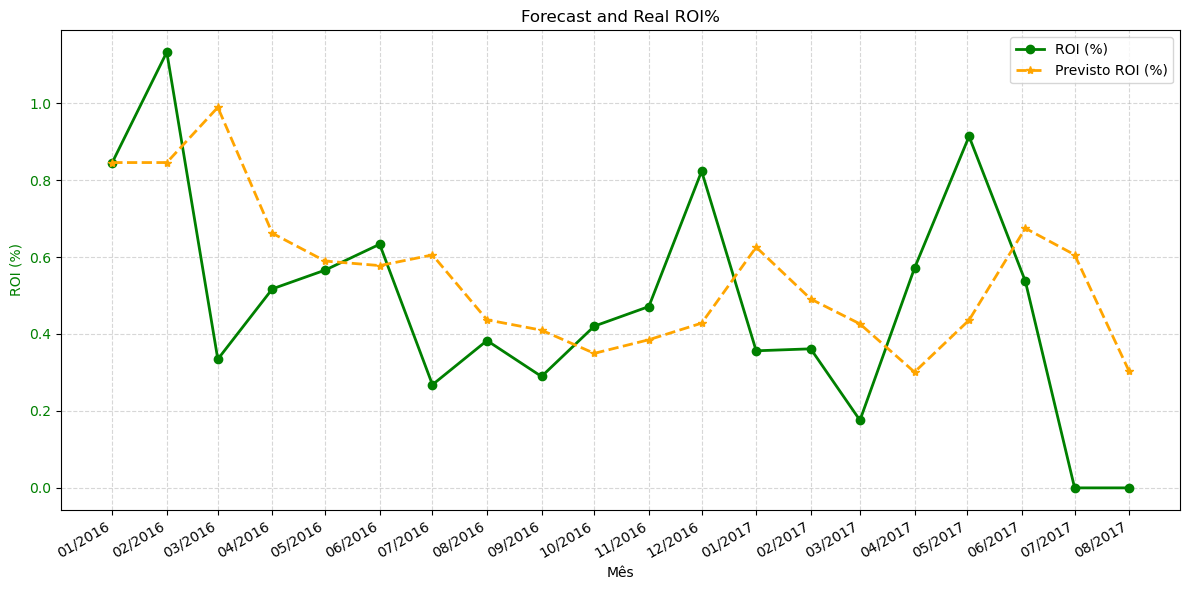

Previsão: 
    
    Realizado ROI (maio de 2017) = 0.91 %
    Realizado ROI (junho de 2017) = 0.54 % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de 0.48 p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de 0.14 p.p    
    


tipo,Month,investimento,leads,ROI(%),ROI previsto%,Erro Absoluto(%),Erro Absoluto,Erro Quadrático
0,2016-01-01,2.704421e+05,2287.000000,0.845652,0.845652,0.000000,0.000000,0.000000e+00
1,2016-02-01,2.308607e+05,2615.000000,1.132717,0.845652,0.287065,0.002871,8.240635e-06
2,2016-03-01,7.544001e+05,2523.000000,0.334438,0.989185,0.654747,0.006547,4.286936e-05
3,2016-04-01,6.815992e+05,3526.000000,0.517313,0.661811,0.144499,0.001445,2.087984e-06
4,2016-05-01,6.347326e+05,3593.000000,0.566065,0.589562,0.023497,0.000235,5.521087e-08
5,2016-06-01,7.838748e+05,4964.000000,0.633264,0.577814,0.055451,0.000555,3.074784e-07
6,2016-07-01,7.495170e+05,2010.000000,0.268173,0.605539,0.337366,0.003374,1.138160e-05
7,2016-08-01,6.581322e+05,2520.000000,0.382902,0.436856,0.053954,0.000540,2.911039e-07
8,2016-09-01,7.863641e+05,2277.000000,0.289561,0.409879,0.120318,0.001203,1.447650e-06
9,2016-10-01,5.956009e+05,2504.000000,0.420416,0.349720,0.070696,0.000707,4.997937e-07


In [76]:
df_SExponencial = calculo_erros(df_SExponencial)
df_SExponencial

O valor da regressão de maio e junho de 2017 está em 3-2-Modelo_media_movel_simples.ipynb

Regressão:

A variação em maio de 2017 foi de 0.08 p.p

A variação em junho de 2017 foi de 0.06 p.p



#### objetivo minimizar o erro abs => média erro abs

alterando apenas o alfa

- as restrições são que o alfa não pode ser menor do que 0 (assumindo valores positivos) e também não pode ser maior do que 1

- Tornar variáveis irrestritas não negativas

- Modelo não linear

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html


#### (SLSQP = Sequential Least Squares Programming)

##### Esse é o método não linear mais usado para otimizações com restrições de igualdade/limites, como no Solver do Excel com método GRG Nonlinear.


In [77]:
df_copy_safe

tipo,Month,investimento,leads,ROI(%),ROI previsto%
0,2016-01-01,2.704421e+05,2287.000000,0.845652,0.845652
1,2016-02-01,2.308607e+05,2615.000000,1.132717,0.000000
2,2016-03-01,7.544001e+05,2523.000000,0.334438,0.000000
3,2016-04-01,6.815992e+05,3526.000000,0.517313,0.000000
4,2016-05-01,6.347326e+05,3593.000000,0.566065,0.000000
5,2016-06-01,7.838748e+05,4964.000000,0.633264,0.000000
6,2016-07-01,7.495170e+05,2010.000000,0.268173,0.000000
7,2016-08-01,6.581322e+05,2520.000000,0.382902,0.000000
8,2016-09-01,7.863641e+05,2277.000000,0.289561,0.000000
9,2016-10-01,5.956009e+05,2504.000000,0.420416,0.000000


In [78]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize


In [85]:


def calculo_solver(a_, df):

    # Parâmetro de suavização
    alfa = a_
    
    # Aplica a suavização exponencial recursiva
    for i in range(1, len(df)):
        df.loc[i, 'ROI previsto%'] = (
            alfa * df.loc[i - 1, 'ROI(%)'] +
            (1 - alfa) * df.loc[i - 1, 'ROI previsto%']
        )

    # Cálculo dos erros
    df['Erro Absoluto(%)'] = abs(df['ROI(%)'] - df['ROI previsto%'])
    df['Erro Absoluto'] = df['Erro Absoluto(%)'] / 100
    df['Erro Quadrático'] = df['Erro Absoluto'] ** 2

    # Erro médio absoluto entre as linhas 3 e 18
    media_erro_abs = df['Erro Absoluto'][3:19].mean()

    return media_erro_abs


In [92]:

# Chute inicial para os pesos
alfa_incial = [0.2]

# Restrição: soma dos pesos deve ser 1
restricao = {'type': 'eq', 'fun': lambda alfa: alfa[0] - 1 }

# Limites dos pesos: entre 0 e 1
limites = [(0, 1)]

# Otimização
resultado = minimize(
    calculo_solver,
    alfa_incial,
    args=(df_copy_safe,),  # seu DataFrame original
    method='SLSQP',
    bounds=limites,
    constraints=[restricao]
)

# Exibir resultados
if resultado.success:
    alfa = resultado.x
    print(f"Pesos ótimos: alfa ={alfa[0]:.4f}")
else:
    print("Otimização falhou:", resultado.message)

Pesos ótimos: alfa =1.0000


In [93]:
resultado

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.002321885049962765
       x: [ 1.000e+00]
     nit: 2
     jac: [ 1.003e-03]
    nfev: 4
    njev: 2

In [89]:
resultado.x[0]

1.0


    Média (Erro ABS) = 0.0023219
    
    Média (Erro²) = 0.0000081
    
Previsão 
    
    Realizado (junho de 2017) = 0.54 %
    
    Estimado (Previsto em junho de 2017) = 0.91 %
    
    A variação foi de 0.38 pontos percentuais.    
    
gráfico comparativo


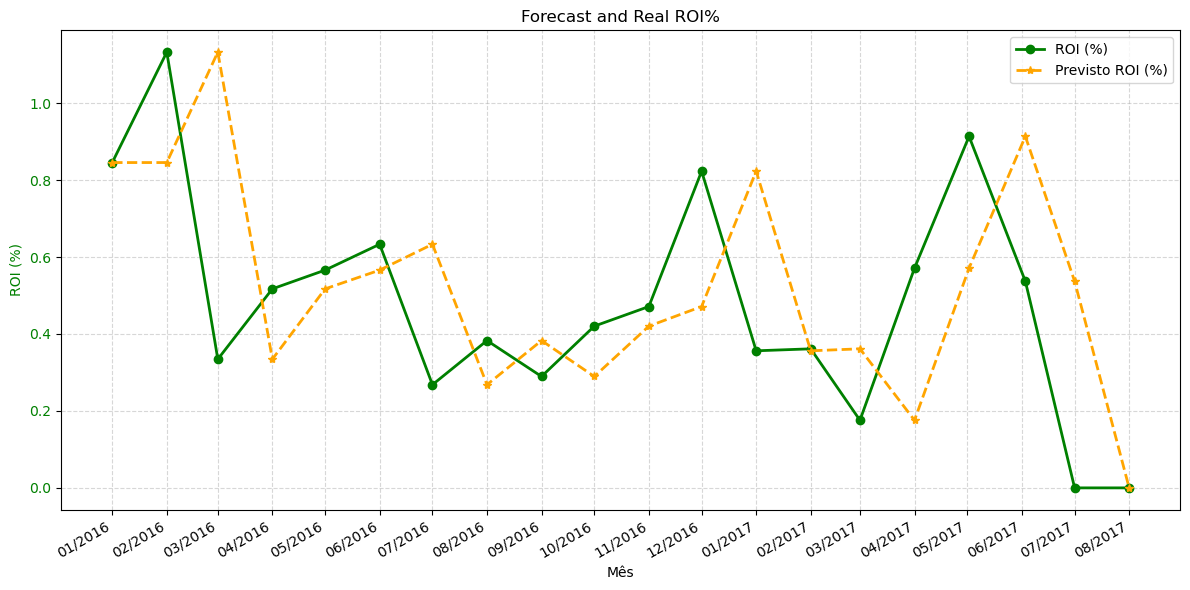

Previsão: 
    
    Realizado ROI (maio de 2017) = 0.91 %
    Realizado ROI (junho de 2017) = 0.54 % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de 0.34 p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de 0.38 p.p    
    


tipo,Month,investimento,leads,ROI(%),ROI previsto%,Erro Absoluto(%),Erro Absoluto,Erro Quadrático
0,2016-01-01,2.704421e+05,2287.000000,0.845652,0.845652,0.000000,0.000000,0.000000e+00
1,2016-02-01,2.308607e+05,2615.000000,1.132717,0.845652,0.287065,0.002871,8.240635e-06
2,2016-03-01,7.544001e+05,2523.000000,0.334438,1.132717,0.798280,0.007983,6.372502e-05
3,2016-04-01,6.815992e+05,3526.000000,0.517313,0.334438,0.182875,0.001829,3.344324e-06
4,2016-05-01,6.347326e+05,3593.000000,0.566065,0.517313,0.048752,0.000488,2.376787e-07
5,2016-06-01,7.838748e+05,4964.000000,0.633264,0.566065,0.067199,0.000672,4.515737e-07
6,2016-07-01,7.495170e+05,2010.000000,0.268173,0.633264,0.365092,0.003651,1.332919e-05
7,2016-08-01,6.581322e+05,2520.000000,0.382902,0.268173,0.114729,0.001147,1.316277e-06
8,2016-09-01,7.863641e+05,2277.000000,0.289561,0.382902,0.093341,0.000933,8.712596e-07
9,2016-10-01,5.956009e+05,2504.000000,0.420416,0.289561,0.130855,0.001309,1.712310e-06


In [95]:
alfa = 1.0
df_SExponencial['ROI previsto%'] = 0.0
# Inicializa o primeiro valor do previsto como o próprio ROI
df_SExponencial.loc[0, 'ROI previsto%'] = df_SExponencial.loc[0, 'ROI(%)']
# Aplica a suavização exponencial recursiva
for i in range(1, len(df_SExponencial)):
    df_SExponencial.loc[i, 'ROI previsto%'] = (
        alfa * df_SExponencial.loc[i - 1, 'ROI(%)'] +
        (1 - alfa) * df_SExponencial.loc[i - 1, 'ROI previsto%']
    )
df_SExponencial = calculo_erros(df_SExponencial)
display(df_SExponencial)


# Validação correta do solver

In [96]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

def calculo_solver(a_, df):
    alfa = a_[0]
    
    df = df.copy()
    df['ROI previsto%'] = np.nan
    df.loc[0, 'ROI previsto%'] = df.loc[0, 'ROI(%)']  # valor inicial da previsão

    # Suavização exponencial recursiva
    for i in range(1, len(df)):
        df.loc[i, 'ROI previsto%'] = (
            alfa * df.loc[i - 1, 'ROI(%)'] +
            (1 - alfa) * df.loc[i - 1, 'ROI previsto%']
        )

    df['Erro Absoluto'] = abs(df['ROI(%)'] - df['ROI previsto%']) / 100
    media_erro_abs = df['Erro Absoluto'][3:19].mean()

    return media_erro_abs

# Chute inicial
alfa_inicial = [0.2]

# Limites entre 0 e 1
limites = [(0, 1)]

# Otimização sem restrições adicionais
resultado = minimize(
    calculo_solver,
    alfa_inicial,
    args=(df_copy_safe,),
    method='SLSQP',
    bounds=limites
)

# Exibir resultado
if resultado.success:
    alfa_otimo = resultado.x[0]
    print(f"Alfa ótimo: {alfa_otimo:.4f}")
else:
    print("Otimização falhou:", resultado.message)

Alfa ótimo: 0.3307



    Média (Erro ABS) = 0.0021185
    
    Média (Erro²) = 0.0000071
    
Previsão 
    
    Realizado (junho de 2017) = 0.54 %
    
    Estimado (Previsto em junho de 2017) = 0.59 %
    
    A variação foi de 0.05 pontos percentuais.    
    
gráfico comparativo


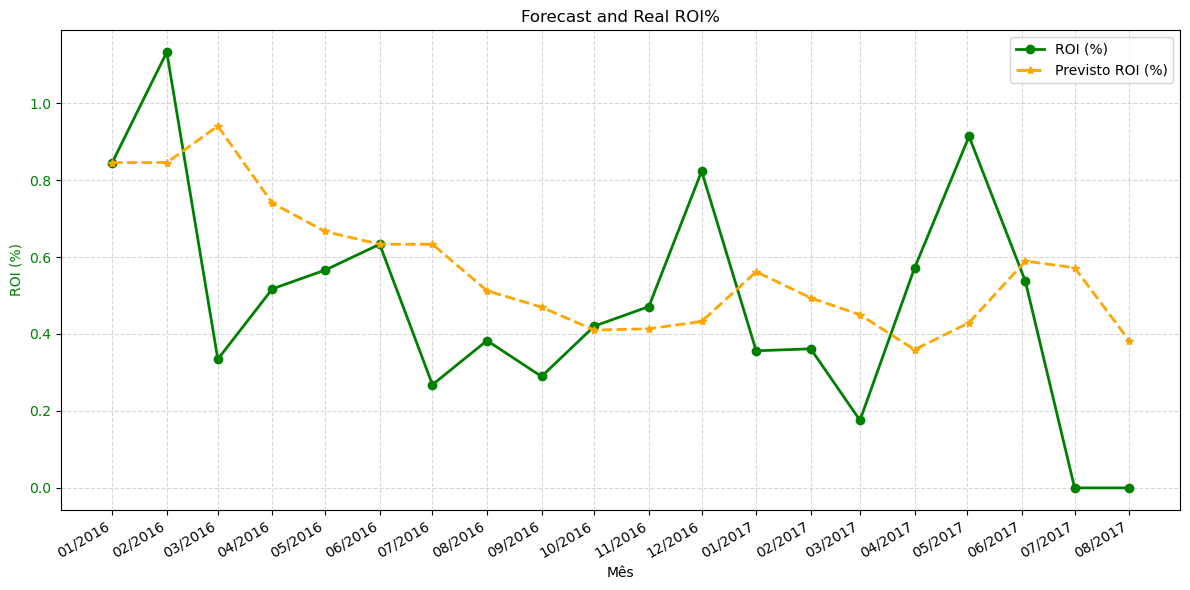

Previsão: 
    
    Realizado ROI (maio de 2017) = 0.91 %
    Realizado ROI (junho de 2017) = 0.54 % 
    WMA
    A variação em maio de 2017 da Média Móvel Ponderada foi de 0.48 p.p
    A variação em junho de 2017 da Média Móvel Ponderada foi de 0.05 p.p    
    


tipo,Month,investimento,leads,ROI(%),ROI previsto%,Erro Absoluto(%),Erro Absoluto,Erro Quadrático
0,2016-01-01,2.704421e+05,2287.000000,0.845652,0.845652,0.000000,0.000000e+00,0.000000e+00
1,2016-02-01,2.308607e+05,2615.000000,1.132717,0.845652,0.287065,2.870651e-03,8.240635e-06
2,2016-03-01,7.544001e+05,2523.000000,0.334438,0.940574,0.606137,6.061365e-03,3.674015e-05
3,2016-04-01,6.815992e+05,3526.000000,0.517313,0.740147,0.222834,2.228341e-03,4.965505e-06
4,2016-05-01,6.347326e+05,3593.000000,0.566065,0.666464,0.100399,1.003986e-03,1.007989e-06
5,2016-06-01,7.838748e+05,4964.000000,0.633264,0.633266,0.000001,1.195698e-08,1.429693e-16
6,2016-07-01,7.495170e+05,2010.000000,0.268173,0.633265,0.365092,3.650925e-03,1.332925e-05
7,2016-08-01,6.581322e+05,2520.000000,0.382902,0.512542,0.129640,1.296405e-03,1.680665e-06
8,2016-09-01,7.863641e+05,2277.000000,0.289561,0.469675,0.180114,1.801143e-03,3.244117e-06
9,2016-10-01,5.956009e+05,2504.000000,0.420416,0.410118,0.010298,1.029822e-04,1.060534e-08


In [97]:
alfa = alfa_otimo
df_SExponencial['ROI previsto%'] = 0.0
# Inicializa o primeiro valor do previsto como o próprio ROI
df_SExponencial.loc[0, 'ROI previsto%'] = df_SExponencial.loc[0, 'ROI(%)']
# Aplica a suavização exponencial recursiva
for i in range(1, len(df_SExponencial)):
    df_SExponencial.loc[i, 'ROI previsto%'] = (
        alfa * df_SExponencial.loc[i - 1, 'ROI(%)'] +
        (1 - alfa) * df_SExponencial.loc[i - 1, 'ROI previsto%']
    )
df_SExponencial = calculo_erros(df_SExponencial)
display(df_SExponencial)


O valor da regressão de maio e junho de 2017 está em 3-2-Modelo_media_movel_simples.ipynb

Regressão:

A variação em maio de 2017 foi de 0.08 p.p

A variação em junho de 2017 foi de 0.06 p.p


-----------------------------------------------------------------------------------------------------

Outras opções não lineares em scipy.optimize.minimize incluem:

Método   |	 Suporta restrições?	|Descrição resumida

SLSQP    |✅ Sim	               |Mais comum para problemas com restrições de igualdade/limites. Muito usado como equivalente ao Solver do Excel.

trust-constr|✅ Sim	              |Algoritmo robusto e moderno. Pode ser melhor para problemas maiores, mas mais lento.

COBYLA	    |✅ Sim (apenas de desigualdade)	|Útil em problemas sem derivadas e com restrições simples.

Powell	    |❌ Não	                 |Não aceita restrições — evita se você precisa de pesos que somem 1.

L-BFGS-B    |	❌                  |Apenas limites	Mais usado em problemas sem restrições de igualdade.

TNC, CG, BFGS, Newton-CG|	❌    |ou parcial	Otimizadores mais gerais, sem suporte direto a restrições de igualdade.